In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist


In [2]:
(tng_values, tng_labels), (test_values, test_labels) = mnist.load_data()

In [3]:
print(tng_values.shape)
print(test_values.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
tng_values = tng_values.reshape(60000,28*28)
test_values = test_values.reshape(10000,28*28)

In [5]:
m,n = tng_values.shape
tng_values = tng_values.T
tng_values = tng_values/255

test_values = test_values.T
test_values = test_values/255

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(arr):
    arr_exp = np.exp(arr - np.max(arr, axis=0, keepdims=True))
    return arr_exp/(arr_exp.sum(axis=0, keepdims=True))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = 2*(A2 - one_hot_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(tng_values, tng_labels, 0.1, 1000)

Iteration:  0
[1 2 6 ... 1 3 6] [5 0 4 ... 5 6 8]
0.11895
Iteration:  10
[5 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
0.27195
Iteration:  20
[5 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
0.42941666666666667
Iteration:  30
[5 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
0.5483833333333333
Iteration:  40
[5 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
0.6225
Iteration:  50
[5 0 3 ... 8 0 8] [5 0 4 ... 5 6 8]
0.6722166666666667
Iteration:  60
[5 0 3 ... 5 6 5] [5 0 4 ... 5 6 8]
0.7073
Iteration:  70
[5 0 3 ... 5 6 5] [5 0 4 ... 5 6 8]
0.7331333333333333
Iteration:  80
[5 0 3 ... 5 6 5] [5 0 4 ... 5 6 8]
0.75235
Iteration:  90
[5 0 3 ... 5 6 5] [5 0 4 ... 5 6 8]
0.76885
Iteration:  100
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
0.7817166666666666
Iteration:  110
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
0.7917666666666666
Iteration:  120
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
0.80155
Iteration:  130
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
0.8079
Iteration:  140
[5 0 4 ... 5 6 5] [5 0 4 ... 5 6 8]
0.8135833333333333
Iteration:  150
[5 0 4 ... 5 6 5] [5

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = tng_values[:, index, None]
    prediction = make_predictions(tng_values[:, index, None], W1, b1, W2, b2)
    label = tng_labels[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


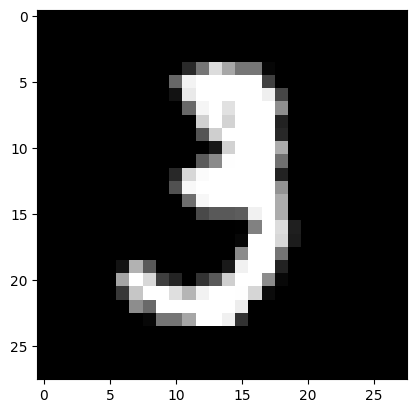

Prediction:  [8]
Label:  5


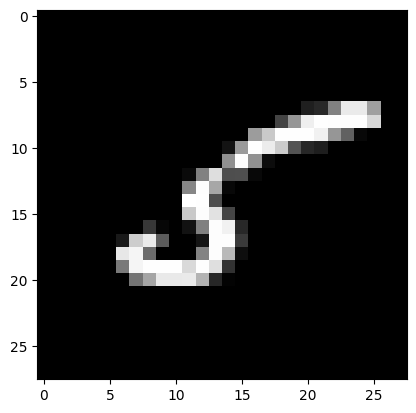

Prediction:  [3]
Label:  3


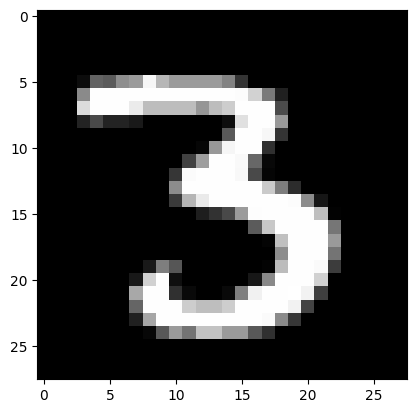

Prediction:  [6]
Label:  6


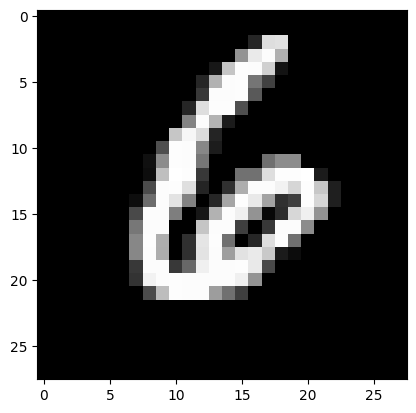

In [10]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)
test_prediction(13, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(test_values, W1, b1, W2, b2)
get_accuracy(dev_predictions, test_labels)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


0.8995